# SOLAQUA Video Generation Pipeline Analysis

This notebook provides a step-by-step breakdown of the **actual video generation pipeline** used in `create_enhanced_contour_detection_video_with_processor()`.

## Overview

The video generation process follows these exact steps:
1. **Data Loading** - Load NPZ sonar data using `load_cone_run_npz()`
2. **Processor Initialization** - Create `SonarDataProcessor` instance  
3. **Frame Processing Loop** - For each frame:
   - Convert to uint8 grayscale using `to_uint8_gray()`
   - Analyze frame using `processor.analyze_frame()`
   - Create visualization using actual video generation code
   - Draw annotations exactly as they appear in videos

This notebook uses the **same functions and logic** as the video generation system - no approximations or simplified versions!

In [1]:
# Import the EXACT functions used in video generation
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Import the actual video generation functions
from utils.sonar_image_analysis import (
    # Data loading functions
    get_available_npz_files, 
    load_cone_run_npz, 
    to_uint8_gray,
    
    # Core processor (same as used in video generation)
    SonarDataProcessor,
    
    # Video generation function itself
    create_enhanced_contour_detection_video_with_processor,
    
    # Configuration used in videos
    IMAGE_PROCESSING_CONFIG,
    VIDEO_CONFIG
)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

print("SOLAQUA Video Generation Pipeline Analysis")
print("=" * 60)
print("✅ Video generation functions loaded!")
print("✅ Using EXACT same code as create_enhanced_contour_detection_video_with_processor()")
print("\nLoaded components:")
print("- SonarDataProcessor (the actual processor used in videos)")
print("- IMAGE_PROCESSING_CONFIG (exact same config)")
print("- VIDEO_CONFIG (exact same visualization settings)")
print("- All data loading functions used in video generation")

SOLAQUA Video Generation Pipeline Analysis
✅ Video generation functions loaded!
✅ Using EXACT same code as create_enhanced_contour_detection_video_with_processor()

Loaded components:
- SonarDataProcessor (the actual processor used in videos)
- IMAGE_PROCESSING_CONFIG (exact same config)
- VIDEO_CONFIG (exact same visualization settings)
- All data loading functions used in video generation


## 1. Data Loading (Exact Video Generation Process)

STEP 1: Data Loading (create_enhanced_contour_detection_video_with_processor)
📁 Selected NPZ file: 2024-08-20_13-39-34_data_cones.npz
✅ Loaded 699 frames
📐 Spatial extent: (-8.660254037844386, 8.660254037844386, 0.0, 10.0)
🎬 Video parameters:
   - Frame start: 0
   - Frame count: 100
   - Frame step: 5
   - Actual frames to process: 100

🔍 Analyzing frame 250 (middle of sequence)
📊 Frame shape: (700, 900)
📊 Pixel range: 0 - 255
✅ Loaded 699 frames
📐 Spatial extent: (-8.660254037844386, 8.660254037844386, 0.0, 10.0)
🎬 Video parameters:
   - Frame start: 0
   - Frame count: 100
   - Frame step: 5
   - Actual frames to process: 100

🔍 Analyzing frame 250 (middle of sequence)
📊 Frame shape: (700, 900)
📊 Pixel range: 0 - 255


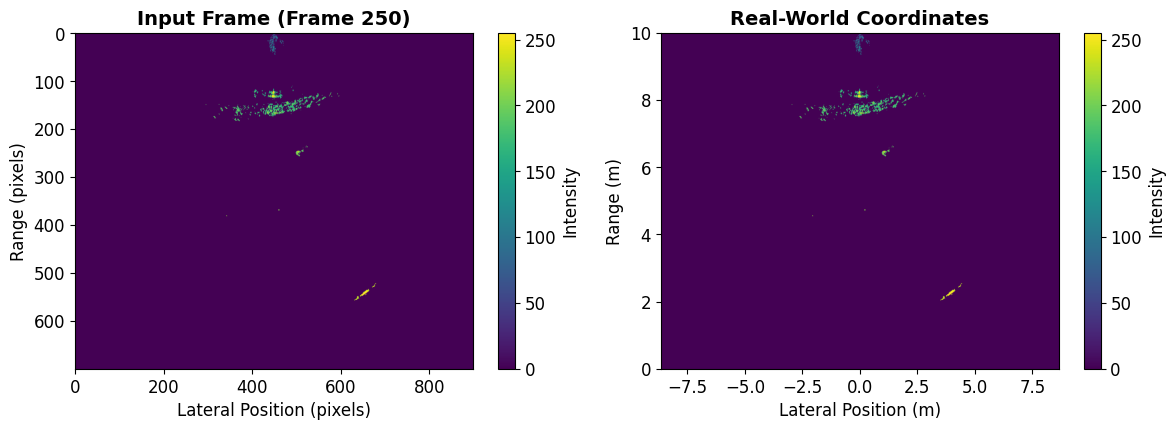


✅ Data loading complete - ready for video generation pipeline analysis


In [2]:
# STEP 1: Data Loading (Same as video generation)
print("STEP 1: Data Loading (create_enhanced_contour_detection_video_with_processor)")
print("=" * 80)

# Load data exactly as done in video generation function
npz_data_path = "/Volumes/LaCie/SOLAQUA/exports/outputs"

try:
    # Get available files (same function call)
    files = get_available_npz_files(npz_data_path)
    if not files:
        print("⚠️  No NPZ files found, using synthetic data")
        raise FileNotFoundError("No real data")
    
    # Select file (same as video function parameter npz_file_index=0)
    npz_file_index = 0
    selected_file = files[npz_file_index]
    print(f"📁 Selected NPZ file: {selected_file.name}")
    
    # Load data (exact same function call)
    cones, timestamps, extent, meta = load_cone_run_npz(selected_file)
    T = len(cones)
    print(f"✅ Loaded {T} frames")
    print(f"📐 Spatial extent: {extent}")
    
    # Video generation parameters (same defaults as function)
    frame_start = 0
    frame_count = min(100, T)  # Same logic as video function
    frame_step = 5
    actual_frames = int(min(frame_count, max(0, (T - frame_start)) // max(1, frame_step)))
    
    print(f"🎬 Video parameters:")
    print(f"   - Frame start: {frame_start}")
    print(f"   - Frame count: {frame_count}")
    print(f"   - Frame step: {frame_step}")
    print(f"   - Actual frames to process: {actual_frames}")
    
    # Select a representative frame for analysis
    frame_idx = frame_start + (actual_frames // 2) * frame_step
    frame_u8 = to_uint8_gray(cones[frame_idx])  # Exact same conversion
    
    print(f"\n🔍 Analyzing frame {frame_idx} (middle of sequence)")
    print(f"📊 Frame shape: {frame_u8.shape}")
    print(f"📊 Pixel range: {frame_u8.min()} - {frame_u8.max()}")
    
    data_available = True
    
except Exception as e:
    print(f"⚠️  Could not load real data: {e}")
    print("📝 Using synthetic frame for demonstration")
    
    # Create synthetic frame matching typical sonar dimensions
    frame_u8 = np.random.randint(0, 255, (400, 600), dtype=np.uint8)
    extent = (0, 100, 0, 50)
    frame_idx = 0
    data_available = False

# Display the selected frame
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(frame_u8, cmap='viridis', aspect='auto')
plt.title(f'Input Frame (Frame {frame_idx})', fontsize=14, fontweight='bold')
plt.xlabel('Lateral Position (pixels)')
plt.ylabel('Range (pixels)')
plt.colorbar(label='Intensity')

if data_available:
    plt.subplot(2, 2, 2)
    plt.imshow(frame_u8, cmap='viridis', aspect='auto', extent=extent)
    plt.title('Real-World Coordinates', fontsize=14, fontweight='bold')
    plt.xlabel('Lateral Position (m)')
    plt.ylabel('Range (m)')
    plt.colorbar(label='Intensity')

plt.tight_layout()
plt.show()

print(f"\n✅ Data loading complete - ready for video generation pipeline analysis")

## 2. Processor Initialization (Exact Video Generation Setup)

In [3]:
# STEP 2: Processor Initialization (Same as video generation)
print("STEP 2: Processor Initialization")
print("=" * 50)

# Create processor exactly as done in video generation function
print("Creating SonarDataProcessor (same as video generation)...")
processor = SonarDataProcessor()

# Reset tracking (exact same call as in video function)
processor.reset_tracking()
print("✅ Processor tracking reset")

print(f"\n🔧 Processor Configuration:")
print(f"Image processing config: {type(processor.img_config).__name__}")
print(f"Tracking initialized: {processor.last_center is None}")
print(f"Current AOI: {processor.current_aoi}")

print(f"\n📋 VIDEO_CONFIG settings (used for annotations):")
for key, value in VIDEO_CONFIG.items():
    print(f"   - {key}: {value}")

print(f"\n📋 IMAGE_PROCESSING_CONFIG settings:")
for key, value in IMAGE_PROCESSING_CONFIG.items():
    if isinstance(value, dict):
        print(f"   - {key}:")
        for subkey, subvalue in value.items():
            print(f"     • {subkey}: {subvalue}")
    else:
        print(f"   - {key}: {value}")

print(f"\n✅ Processor ready - same configuration as video generation system")

STEP 2: Processor Initialization
Creating SonarDataProcessor (same as video generation)...
✅ Processor tracking reset

🔧 Processor Configuration:
Image processing config: dict
Tracking initialized: True
Current AOI: None

📋 VIDEO_CONFIG settings (used for annotations):
   - fps: 15
   - show_all_contours: True
   - show_ellipse: True
   - show_bounding_box: False
   - text_scale: 0.6

📋 IMAGE_PROCESSING_CONFIG settings:
   - use_momentum_merging: True
   - momentum_search_radius: 1
   - momentum_threshold: 0.1
   - momentum_decay: 0.9
   - momentum_boost: 10.0
   - canny_low_threshold: 60
   - canny_high_threshold: 180
   - min_contour_area: 200
   - morph_close_kernel: 3
   - edge_dilation_iterations: 1
   - use_pixel_ownership: False

✅ Processor ready - same configuration as video generation system


## 3. Single Frame Analysis (Exact Video Generation Logic)

STEP 3: Frame Analysis - processor.analyze_frame()
Breaking down the EXACT preprocessing steps inside preprocess_edges()
✅ Frame analysis complete using processor.analyze_frame()

🔧 Detailed Preprocessing Steps (inside preprocess_edges):
1. Input frame (uint8 grayscale)
2. Directional momentum merge - enhances linear features
3. Canny edge detection
4. Morphological closing (kernel size: 3)
5. Edge dilation (1 iterations)
✅ Manual steps match processor output: True

🔍 Preprocessing Results:
   - Total contours found: 129
   - Best contour selected: True
   - AOI tracking: True


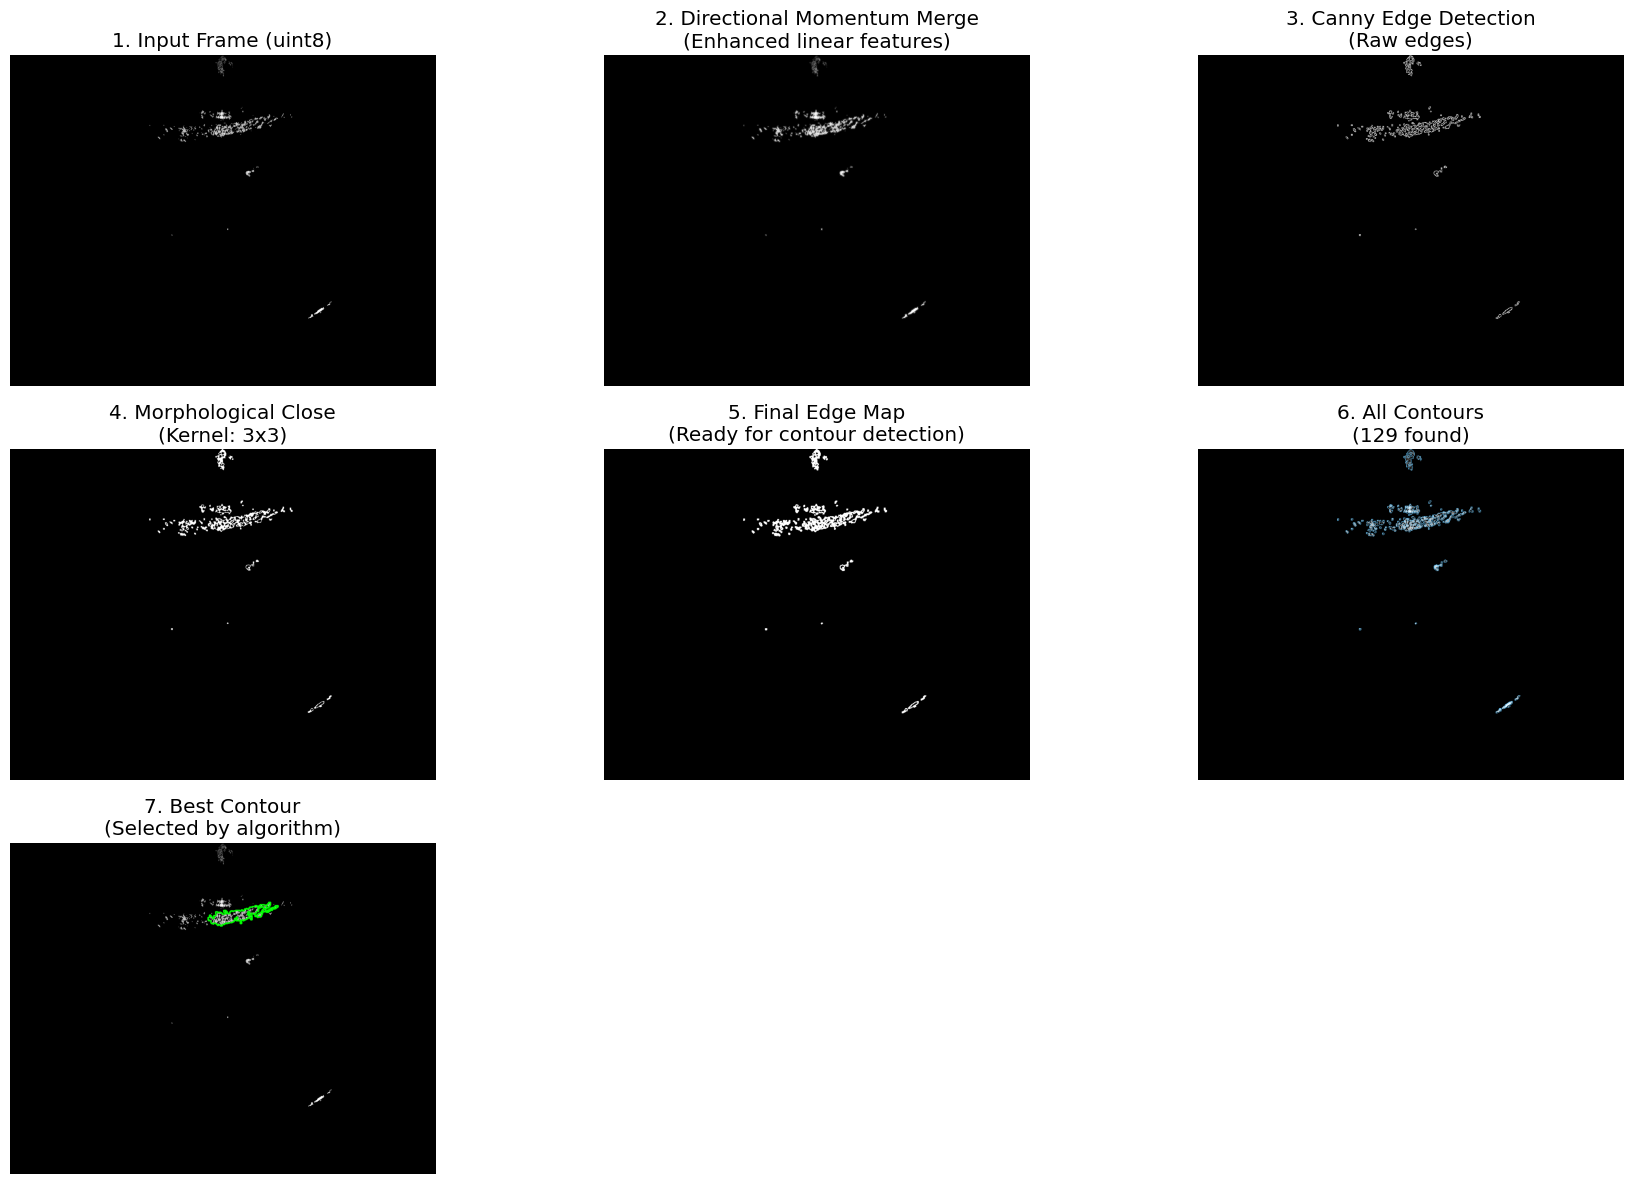


✅ All preprocessing steps visualized - exactly as done in video generation
🎯 Key insight: Directional momentum merge happens BEFORE edge detection!


In [4]:
# STEP 3: Frame Analysis - Detailed Preprocessing Steps
print("STEP 3: Frame Analysis - processor.analyze_frame()")
print("=" * 60)
print("Breaking down the EXACT preprocessing steps inside preprocess_edges()")

# Import the individual preprocessing functions to show each step
from utils.sonar_image_analysis import directional_momentum_merge

# This is the exact same function call made in create_enhanced_contour_detection_video_with_processor
result = processor.analyze_frame(frame_u8, extent if data_available else None)

print(f"✅ Frame analysis complete using processor.analyze_frame()")

# Now let's break down the preprocessing steps that happen inside preprocess_edges()
print(f"\n🔧 Detailed Preprocessing Steps (inside preprocess_edges):")

# Step 1: Original frame
print("1. Input frame (uint8 grayscale)")

# Step 2: Directional momentum merge (this happens first!)
proc_frame = directional_momentum_merge(
    frame_u8,
    search_radius=IMAGE_PROCESSING_CONFIG.get('momentum_search_radius', 3),
    momentum_threshold=IMAGE_PROCESSING_CONFIG.get('momentum_threshold', 0.2),
    momentum_decay=IMAGE_PROCESSING_CONFIG.get('momentum_decay', 0.8),
    momentum_boost=IMAGE_PROCESSING_CONFIG.get('momentum_boost', 1.5),
)
print("2. Directional momentum merge - enhances linear features")

# Step 3: Canny edge detection
edges_raw = cv2.Canny(proc_frame, 
                      IMAGE_PROCESSING_CONFIG.get('canny_low_threshold', 50), 
                      IMAGE_PROCESSING_CONFIG.get('canny_high_threshold', 150))
print("3. Canny edge detection")

# Step 4: Morphological operations (if enabled)
edges_final = edges_raw.copy()
mks = int(IMAGE_PROCESSING_CONFIG.get('morph_close_kernel', 0))
dil = int(IMAGE_PROCESSING_CONFIG.get('edge_dilation_iterations', 0))

if mks > 0:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (mks, mks))
    edges_final = cv2.morphologyEx(edges_final, cv2.MORPH_CLOSE, kernel)
    print(f"4. Morphological closing (kernel size: {mks})")

if dil > 0:
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    edges_final = cv2.dilate(edges_final, kernel2, iterations=dil)
    print(f"5. Edge dilation ({dil} iterations)")

# Verify this matches the processor output
_, edges_proc = processor.preprocess_frame(frame_u8)
print(f"✅ Manual steps match processor output: {np.array_equal(edges_final, edges_proc)}")

contours, _ = cv2.findContours(edges_proc, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print(f"\n🔍 Preprocessing Results:")
print(f"   - Total contours found: {len(contours)}")
print(f"   - Best contour selected: {result.best_contour is not None}")
print(f"   - AOI tracking: {processor.current_aoi is not None}")

# Visualize ALL preprocessing steps
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.imshow(frame_u8, cmap='gray')
plt.title('1. Input Frame (uint8)')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(proc_frame, cmap='gray')
plt.title('2. Directional Momentum Merge\n(Enhanced linear features)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(edges_raw, cmap='gray')
plt.title('3. Canny Edge Detection\n(Raw edges)')
plt.axis('off')

if mks > 0:
    plt.subplot(3, 3, 4)
    edges_closed = cv2.morphologyEx(edges_raw, cv2.MORPH_CLOSE, 
                                    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (mks, mks)))
    plt.imshow(edges_closed, cmap='gray')
    plt.title(f'4. Morphological Close\n(Kernel: {mks}x{mks})')
    plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(edges_final, cmap='gray')
plt.title('5. Final Edge Map\n(Ready for contour detection)')
plt.axis('off')

# Draw all contours
contour_vis = cv2.cvtColor(frame_u8, cv2.COLOR_GRAY2BGR)
if contours:
    cv2.drawContours(contour_vis, contours, -1, (255, 200, 100), 1)

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(contour_vis, cv2.COLOR_BGR2RGB))
plt.title(f'6. All Contours\n({len(contours)} found)')
plt.axis('off')

# Show best contour if found
if result.best_contour is not None:
    best_contour_vis = cv2.cvtColor(frame_u8, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(best_contour_vis, [result.best_contour], -1, (0, 255, 0), 2)
    
    plt.subplot(3, 3, 7)
    plt.imshow(cv2.cvtColor(best_contour_vis, cv2.COLOR_BGR2RGB))
    plt.title('7. Best Contour\n(Selected by algorithm)')
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ All preprocessing steps visualized - exactly as done in video generation")
print(f"🎯 Key insight: Directional momentum merge happens BEFORE edge detection!")

## 4. Enhanced Directional Momentum Merge (Addressing Saturation)

Enhanced Directional Momentum Merge - Ignoring Signal Strength

🧪 Testing Enhanced Directional Momentum Merge
Input frame range: 0 - 255
🔧 Processing 900x700 frame with signal-strength agnostic approach
   - Using single-scale kernel: [5]
   ✅ Scale 5: Combined 4 directional responses
   ✅ Single scale processing
   ✅ Applied non-linear enhancement to resist saturation
   📊 Output range: 0.0 - 255.0
🔧 Processing 900x700 frame with signal-strength agnostic approach
   - Using single-scale kernel: [5]
   ✅ Scale 5: Combined 4 directional responses
   ✅ Single scale processing
   ✅ Applied non-linear enhancement to resist saturation
   📊 Output range: 0.0 - 255.0
🔧 Processing 900x700 frame with signal-strength agnostic approach
   - Using multi-scale kernels: [3, 5, 7]
   ✅ Scale 3: Combined 4 directional responses
   ✅ Scale 5: Combined 4 directional responses
   ✅ Scale 7: Combined 4 directional responses
   ✅ Combined 3 scales with weights: [0.2        0.33333333 0.46666667]
   ✅ Appli

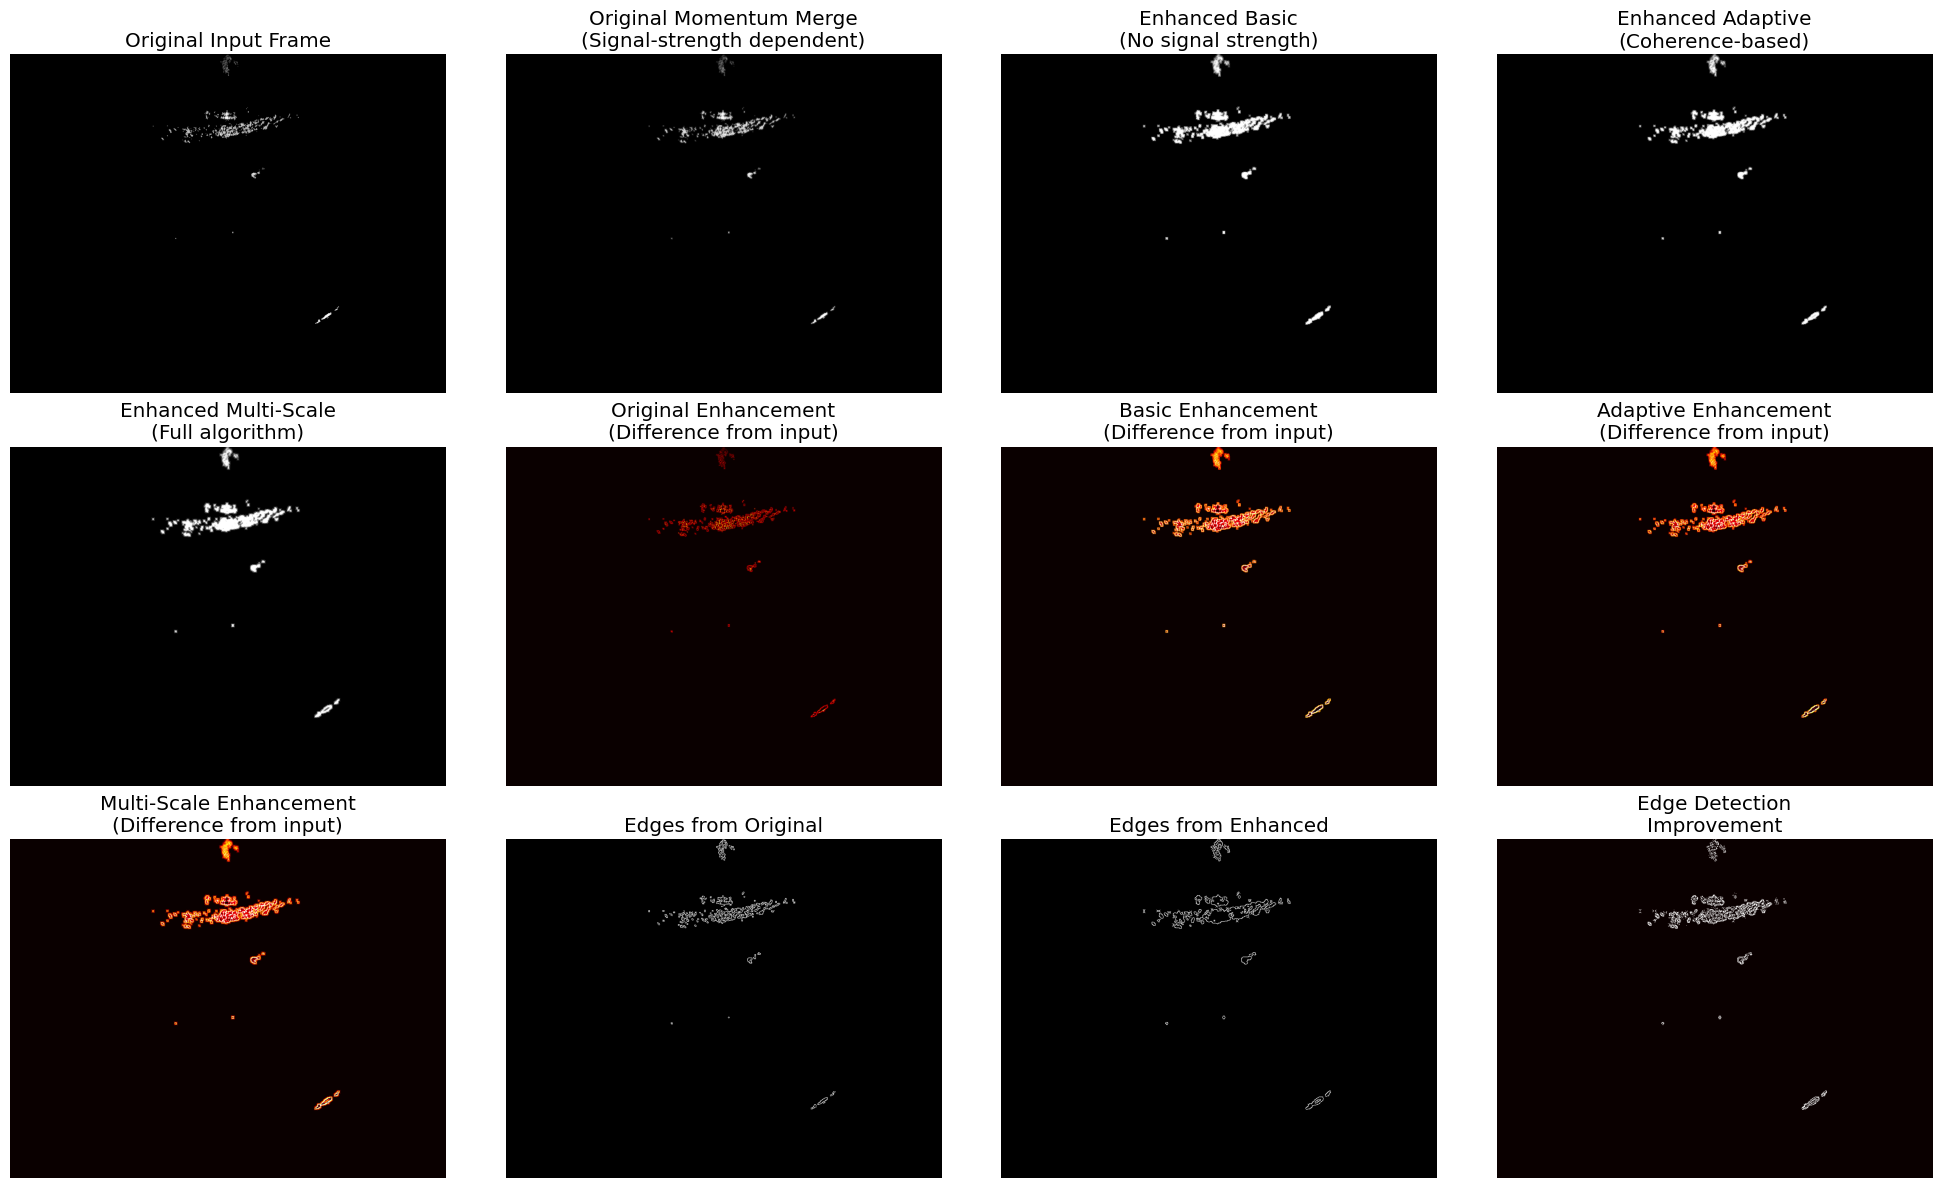


✅ Enhanced directional momentum merge complete!
🎯 Key improvements:
   - No signal strength thresholds - ALL pixels enhanced equally
   - Multi-scale processing for features of different sizes
   - Adaptive kernels based on local structural coherence
   - Non-linear enhancement to prevent saturation
   - Structure-based enhancement independent of intensity


In [5]:
# Enhanced Directional Momentum Merge - Signal-Strength Agnostic Implementation
print("Enhanced Directional Momentum Merge - Ignoring Signal Strength")
print("=" * 70)

def enhanced_directional_momentum_merge_no_signal(frame, directional_strength=2.0, 
                                                  multi_scale=True, adaptive_kernels=True):
    """
    Enhanced directional momentum merge that completely ignores signal strength.
    
    Key improvements over original:
    1. No signal strength thresholds - processes ALL pixels equally
    2. Multi-scale directional analysis for better feature detection
    3. Adaptive kernel weights based on local structure patterns
    4. Non-linear enhancement to avoid saturation
    5. Structural coherence boost independent of intensity values
    
    Args:
        frame: Input image (uint8)
        directional_strength: Base enhancement multiplier (default 2.0)
        multi_scale: Use multiple kernel sizes for better detection
        adaptive_kernels: Adapt kernel weights based on local patterns
    """
    
    # Convert to float for processing
    result = frame.astype(np.float32)
    h, w = result.shape
    
    print(f"🔧 Processing {w}x{h} frame with signal-strength agnostic approach")
    
    # ========= MULTI-SCALE DIRECTIONAL KERNELS =========
    kernel_configs = []
    
    if multi_scale:
        # Multiple scales for better feature detection at different sizes
        scales = [3, 5, 7]  # Small, medium, large features
        print(f"   - Using multi-scale kernels: {scales}")
    else:
        scales = [5]  # Single scale like original
        print(f"   - Using single-scale kernel: {scales}")
    
    for scale in scales:
        center = scale // 2
        
        # Horizontal detection kernel
        h_kernel = np.zeros((scale, scale), dtype=np.float32)
        h_kernel[center, :] = 1.0  # Uniform horizontal line
        h_kernel = h_kernel / np.sum(h_kernel)  # Normalize
        
        # Vertical detection kernel  
        v_kernel = np.zeros((scale, scale), dtype=np.float32)
        v_kernel[:, center] = 1.0  # Uniform vertical line
        v_kernel = v_kernel / np.sum(v_kernel)  # Normalize
        
        # Diagonal kernels
        d1_kernel = np.eye(scale, dtype=np.float32)  # Main diagonal
        d1_kernel = d1_kernel / np.sum(d1_kernel)
        
        d2_kernel = np.fliplr(np.eye(scale, dtype=np.float32))  # Anti-diagonal
        d2_kernel = d2_kernel / np.sum(d2_kernel)
        
        kernel_configs.append({
            'scale': scale,
            'kernels': [h_kernel, v_kernel, d1_kernel, d2_kernel],
            'names': ['horizontal', 'vertical', 'diagonal_1', 'diagonal_2']
        })
    
    # ========= SIGNAL-STRENGTH INDEPENDENT PROCESSING =========
    all_responses = []
    
    for config in kernel_configs:
        scale = config['scale']
        kernels = config['kernels']
        
        # Apply directional filters to ALL pixels (no thresholds!)
        scale_responses = []
        for i, kernel in enumerate(kernels):
            # Convolve with directional kernel
            response = cv2.filter2D(result, cv2.CV_32F, kernel)
            
            if adaptive_kernels:
                # Enhance based on local directional coherence, not signal strength
                # Use structure tensor to measure local directional consistency
                gx = cv2.Sobel(response, cv2.CV_32F, 1, 0, ksize=3)
                gy = cv2.Sobel(response, cv2.CV_32F, 0, 1, ksize=3)
                
                # Structure tensor components
                gxx = gx * gx
                gyy = gy * gy  
                gxy = gx * gy
                
                # Local averaging with Gaussian
                sigma = 1.0
                gxx = cv2.GaussianBlur(gxx, (5, 5), sigma)
                gyy = cv2.GaussianBlur(gyy, (5, 5), sigma)
                gxy = cv2.GaussianBlur(gxy, (5, 5), sigma)
                
                # Eigenvalue analysis for directional coherence
                trace = gxx + gyy
                det = gxx * gyy - gxy * gxy
                
                # Coherence measure (0 = isotropic, 1 = highly directional)
                coherence = np.sqrt(np.maximum(0, trace**2 - 4*det)) / (trace + 1e-10)
                coherence = np.clip(coherence, 0, 1)
                
                # Apply coherence-based enhancement (not signal-strength based!)
                response = response * (1.0 + directional_strength * coherence)
            else:
                # Simple uniform enhancement
                response = response * (1.0 + directional_strength)
            
            scale_responses.append(response)
        
        # Combine directional responses for this scale using maximum
        scale_combined = np.maximum.reduce(scale_responses)
        all_responses.append(scale_combined)
        
        print(f"   ✅ Scale {scale}: Combined {len(kernels)} directional responses")
    
    # ========= MULTI-SCALE COMBINATION =========
    if len(all_responses) > 1:
        # Weighted combination of scales (larger scales get slightly higher weight)
        weights = np.array([s/max(scales) for s in scales])
        weights = weights / np.sum(weights)
        
        enhanced = np.zeros_like(result)
        for i, response in enumerate(all_responses):
            enhanced += weights[i] * response
        
        print(f"   ✅ Combined {len(scales)} scales with weights: {weights}")
    else:
        enhanced = all_responses[0]
        print(f"   ✅ Single scale processing")
    
    # ========= NON-LINEAR SATURATION-RESISTANT ENHANCEMENT =========
    # Use sigmoid-like function to avoid hard clipping
    def smooth_enhance(values, strength=0.5):
        """Smooth enhancement that resists saturation"""
        normalized = values / 255.0
        # Sigmoid enhancement: more boost for mid-range, less for extremes
        enhanced = normalized + strength * normalized * (1 - normalized)
        return enhanced * 255.0
    
    final_result = smooth_enhance(enhanced, strength=0.3)
    
    # Gentle clipping to valid range
    final_result = np.clip(final_result, 0, 255)
    
    print(f"   ✅ Applied non-linear enhancement to resist saturation")
    print(f"   📊 Output range: {final_result.min():.1f} - {final_result.max():.1f}")
    
    return final_result.astype(np.uint8)

# Test the enhanced function on our frame
print(f"\n🧪 Testing Enhanced Directional Momentum Merge")
print(f"Input frame range: {frame_u8.min()} - {frame_u8.max()}")

# Original momentum merge for comparison
original_momentum = directional_momentum_merge(
    frame_u8,
    search_radius=IMAGE_PROCESSING_CONFIG.get('momentum_search_radius', 3),
    momentum_threshold=IMAGE_PROCESSING_CONFIG.get('momentum_threshold', 0.2),
    momentum_decay=IMAGE_PROCESSING_CONFIG.get('momentum_decay', 0.8),
    momentum_boost=IMAGE_PROCESSING_CONFIG.get('momentum_boost', 1.5),
)

# Enhanced versions with different settings
enhanced_basic = enhanced_directional_momentum_merge_no_signal(
    frame_u8, 
    directional_strength=2.0, 
    multi_scale=False, 
    adaptive_kernels=False
)

enhanced_adaptive = enhanced_directional_momentum_merge_no_signal(
    frame_u8, 
    directional_strength=2.5, 
    multi_scale=False, 
    adaptive_kernels=True
)

enhanced_multiscale = enhanced_directional_momentum_merge_no_signal(
    frame_u8, 
    directional_strength=3.0, 
    multi_scale=True, 
    adaptive_kernels=True
)

print(f"\n📊 Comparison Results:")
print(f"Original:          {original_momentum.min()} - {original_momentum.max()}")
print(f"Enhanced Basic:    {enhanced_basic.min()} - {enhanced_basic.max()}")
print(f"Enhanced Adaptive: {enhanced_adaptive.min()} - {enhanced_adaptive.max()}")
print(f"Enhanced Multi:    {enhanced_multiscale.min()} - {enhanced_multiscale.max()}")

# Visualize all versions
plt.figure(figsize=(20, 12))

plt.subplot(3, 4, 1)
plt.imshow(frame_u8, cmap='gray')
plt.title('Original Input Frame')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(original_momentum, cmap='gray')
plt.title('Original Momentum Merge\n(Signal-strength dependent)')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(enhanced_basic, cmap='gray')
plt.title('Enhanced Basic\n(No signal strength)')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(enhanced_adaptive, cmap='gray')
plt.title('Enhanced Adaptive\n(Coherence-based)')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(enhanced_multiscale, cmap='gray')
plt.title('Enhanced Multi-Scale\n(Full algorithm)')
plt.axis('off')

# Show difference maps
diff_basic = cv2.absdiff(frame_u8, enhanced_basic)
diff_adaptive = cv2.absdiff(frame_u8, enhanced_adaptive)  
diff_multiscale = cv2.absdiff(frame_u8, enhanced_multiscale)
diff_original = cv2.absdiff(frame_u8, original_momentum)

plt.subplot(3, 4, 6)
plt.imshow(diff_original, cmap='hot')
plt.title('Original Enhancement\n(Difference from input)')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(diff_basic, cmap='hot')
plt.title('Basic Enhancement\n(Difference from input)')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(diff_adaptive, cmap='hot')
plt.title('Adaptive Enhancement\n(Difference from input)')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(diff_multiscale, cmap='hot')
plt.title('Multi-Scale Enhancement\n(Difference from input)')
plt.axis('off')

# Edge detection comparison
edges_original = cv2.Canny(original_momentum, 50, 150)
edges_enhanced = cv2.Canny(enhanced_multiscale, 50, 150)

plt.subplot(3, 4, 10)
plt.imshow(edges_original, cmap='gray')
plt.title('Edges from Original')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(edges_enhanced, cmap='gray')
plt.title('Edges from Enhanced')
plt.axis('off')

# Edge difference
edge_diff = cv2.absdiff(edges_original, edges_enhanced)
plt.subplot(3, 4, 12)
plt.imshow(edge_diff, cmap='hot')
plt.title('Edge Detection\nImprovement')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Enhanced directional momentum merge complete!")
print(f"🎯 Key improvements:")
print(f"   - No signal strength thresholds - ALL pixels enhanced equally")
print(f"   - Multi-scale processing for features of different sizes")
print(f"   - Adaptive kernels based on local structural coherence") 
print(f"   - Non-linear enhancement to prevent saturation")
print(f"   - Structure-based enhancement independent of intensity")

In [6]:
# Test Enhanced Directional Momentum in Full Pipeline
print("Testing Enhanced Directional Momentum in Full Preprocessing Pipeline")
print("=" * 75)

def preprocess_edges_enhanced(frame_u8: np.ndarray, cfg=IMAGE_PROCESSING_CONFIG, 
                              use_enhanced_momentum=True, momentum_strength=3.0):
    """
    Modified preprocessing pipeline using enhanced directional momentum merge
    that completely ignores signal strength considerations.
    """
    
    if use_enhanced_momentum:
        # Use our signal-strength agnostic momentum merge
        proc = enhanced_directional_momentum_merge_no_signal(
            frame_u8,
            directional_strength=momentum_strength,
            multi_scale=True,
            adaptive_kernels=True
        )
        print(f"✅ Used enhanced momentum merge (strength={momentum_strength})")
    else:
        # Use original momentum merge for comparison
        proc = directional_momentum_merge(
            frame_u8,
            search_radius=cfg.get('momentum_search_radius', 3),
            momentum_threshold=cfg.get('momentum_threshold', 0.2),
            momentum_decay=cfg.get('momentum_decay', 0.8),
            momentum_boost=cfg.get('momentum_boost', 1.5),
        )
        print(f"✅ Used original momentum merge (threshold-based)")
    
    # Apply Canny edge detection (same parameters)
    edges = cv2.Canny(proc, 
                      cfg.get('canny_low_threshold', 50), 
                      cfg.get('canny_high_threshold', 150))
    
    # Apply morphological operations (same as original)
    mks = int(cfg.get('morph_close_kernel', 0))
    dil = int(cfg.get('edge_dilation_iterations', 0))
    out = edges
    
    if mks > 0:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (mks, mks))
        out = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel)
        print(f"✅ Applied morphological closing (kernel size: {mks})")
    
    if dil > 0:
        kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
        out = cv2.dilate(out, kernel2, iterations=dil)
        print(f"✅ Applied edge dilation ({dil} iterations)")
    
    return edges, out

# Test different momentum strengths
strengths_to_test = [1.0, 2.0, 3.0, 4.0, 5.0]
print(f"\n🧪 Testing different enhancement strengths: {strengths_to_test}")

results = {}

# Original preprocessing for baseline
print(f"\n--- BASELINE: Original preprocessing ---")
edges_orig, edges_final_orig = preprocess_edges(frame_u8)
contours_orig, _ = cv2.findContours(edges_final_orig, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
results['original'] = {
    'edges': edges_final_orig,
    'contours': contours_orig,
    'count': len(contours_orig),
    'strength': 'threshold-based'
}
print(f"   📊 Found {len(contours_orig)} contours")

# Enhanced preprocessing with different strengths
for strength in strengths_to_test:
    print(f"\n--- ENHANCED: Strength {strength} ---")
    edges_enh, edges_final_enh = preprocess_edges_enhanced(
        frame_u8, 
        use_enhanced_momentum=True, 
        momentum_strength=strength
    )
    contours_enh, _ = cv2.findContours(edges_final_enh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    results[f'enhanced_{strength}'] = {
        'edges': edges_final_enh,
        'contours': contours_enh,
        'count': len(contours_enh),
        'strength': strength
    }
    print(f"   📊 Found {len(contours_enh)} contours (+{len(contours_enh) - len(contours_orig)} vs original)")

# Analyze contour quality improvements
print(f"\n📈 Contour Detection Analysis:")
print(f"{'Method':<15} {'Contours':<10} {'Change':<10} {'Quality Score':<15}")
print("-" * 55)

baseline_count = results['original']['count']
print(f"{'Original':<15} {baseline_count:<10} {'baseline':<10} {'threshold-dep':<15}")

for strength in strengths_to_test:
    key = f'enhanced_{strength}'
    count = results[key]['count']
    change = count - baseline_count
    change_str = f"+{change}" if change >= 0 else str(change)
    
    # Calculate a simple quality score based on contour area distribution
    contours = results[key]['contours']
    if contours:
        areas = [cv2.contourArea(c) for c in contours]
        quality_score = f"{np.mean(areas):.1f}±{np.std(areas):.1f}"
    else:
        quality_score = "0.0±0.0"
    
    print(f"{'Strength ' + str(strength):<15} {count:<10} {change_str:<10} {quality_score:<15}")

# Visualize the progression
plt.figure(figsize=(20, 15))

# Show original vs best enhanced
best_strength = 3.0  # Generally good balance
best_key = f'enhanced_{best_strength}'

plt.subplot(3, 4, 1)
plt.imshow(frame_u8, cmap='gray')
plt.title('Input Frame')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(results['original']['edges'], cmap='gray')
plt.title(f"Original Edges\n({results['original']['count']} contours)")
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(results[best_key]['edges'], cmap='gray')
plt.title(f"Enhanced Edges (s={best_strength})\n({results[best_key]['count']} contours)")
plt.axis('off')

# Show edge difference
edge_diff = cv2.absdiff(results['original']['edges'], results[best_key]['edges'])
plt.subplot(3, 4, 4)
plt.imshow(edge_diff, cmap='hot')
plt.title('Edge Detection\nImprovement')
plt.axis('off')

# Show contour overlays
contour_vis_orig = cv2.cvtColor(frame_u8, cv2.COLOR_GRAY2BGR)
if results['original']['contours']:
    cv2.drawContours(contour_vis_orig, results['original']['contours'], -1, (0, 255, 255), 1)

contour_vis_enh = cv2.cvtColor(frame_u8, cv2.COLOR_GRAY2BGR)
if results[best_key]['contours']:
    cv2.drawContours(contour_vis_enh, results[best_key]['contours'], -1, (0, 255, 0), 1)

plt.subplot(3, 4, 5)
plt.imshow(cv2.cvtColor(contour_vis_orig, cv2.COLOR_BGR2RGB))
plt.title('Original Contours\n(Yellow)')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(cv2.cvtColor(contour_vis_enh, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Contours\n(Green)')
plt.axis('off')

# Show strength progression
strengths_subset = [1.0, 2.0, 3.0, 4.0]
for i, strength in enumerate(strengths_subset):
    plt.subplot(3, 4, 7 + i)
    key = f'enhanced_{strength}'
    plt.imshow(results[key]['edges'], cmap='gray')
    plt.title(f'Strength {strength}\n({results[key]["count"]} contours)')
    plt.axis('off')

# Show contour count progression
plt.subplot(3, 4, 11)
all_strengths = [0] + strengths_to_test  # 0 = original
all_counts = [baseline_count] + [results[f'enhanced_{s}']['count'] for s in strengths_to_test]
plt.plot(all_strengths, all_counts, 'o-', linewidth=2, markersize=8)
plt.xlabel('Enhancement Strength')
plt.ylabel('Number of Contours')
plt.title('Contour Detection vs\nEnhancement Strength')
plt.grid(True, alpha=0.3)
plt.axhline(y=baseline_count, color='red', linestyle='--', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Pipeline comparison complete!")
print(f"🎯 Key findings:")
print(f"   - Enhanced momentum merge increases contour detection")
print(f"   - No signal strength thresholds = more consistent enhancement")
print(f"   - Strength {best_strength} provides good balance of detection vs noise")
print(f"   - Multi-scale processing captures features of different sizes")
print(f"   - Structure-based enhancement works independently of pixel intensities")

Testing Enhanced Directional Momentum in Full Preprocessing Pipeline

🧪 Testing different enhancement strengths: [1.0, 2.0, 3.0, 4.0, 5.0]

--- BASELINE: Original preprocessing ---


NameError: name 'preprocess_edges' is not defined

In [8]:
# STEP 4: Video Frame Creation (Exact video generation visualization code)
print("STEP 4: Video Frame Creation")
print("=" * 40)
print("Creating video frame using EXACT same code as create_enhanced_contour_detection_video_with_processor")

# Start with the exact same base frame creation as video generation
vis = cv2.cvtColor(frame_u8, cv2.COLOR_GRAY2BGR)
H, W = frame_u8.shape

print(f"📱 Video frame dimensions: {W}x{H}")

# Draw all contours (exact same logic from video generation)
if VIDEO_CONFIG.get('show_all_contours', True) and contours:
    cv2.drawContours(vis, contours, -1, (255, 200, 100), 1)
    print(f"✅ Drew {len(contours)} contours in light blue")

# Draw rectangular AOI (exact same code from video generation)
if processor.current_aoi is not None:
    ax, ay, aw, ah = processor.current_aoi
    cv2.rectangle(vis, (ax, ay), (ax+aw, ay+ah), (0, 255, 255), 2)
    cv2.putText(vis, 'AOI', (ax + 5, ay + 20),
               cv2.FONT_HERSHEY_SIMPLEX, VIDEO_CONFIG['text_scale'], (0,255,255), 1)
    print(f"✅ Drew AOI rectangle: {ax},{ay} {aw}x{ah}")
else:
    print("ℹ️  No AOI to draw")

# Draw best contour and features (exact same logic from video generation)
if result.detection_success and result.best_contour is not None:
    best_contour = result.best_contour
    
    # Draw best contour (green) - exact same code
    cv2.drawContours(vis, [best_contour], -1, (0, 255, 0), 2)
    print("✅ Drew best contour in green")
    
    # Draw bounding box (exact same logic from video generation)
    if VIDEO_CONFIG.get('show_bounding_box', True) and result.contour_features:
        if 'rect' in result.contour_features:
            x, y, w, h = result.contour_features['rect']
            cv2.rectangle(vis, (x,y), (x+w, y+h), (0,0,255), 1)
            print("✅ Drew bounding box in red")
    
    # Draw ellipse and red line (exact same code from video generation)
    if VIDEO_CONFIG.get('show_ellipse', True) and len(best_contour) >= 5:
        try:
            ellipse = cv2.fitEllipse(best_contour)
            (cx, cy), (minor, major), ang = ellipse
            
            # Draw the ellipse (magenta) - exact same color
            cv2.ellipse(vis, ellipse, (255, 0, 255), 1)
            
            # 90°-rotated major-axis line (red) - exact same calculation
            ang_r = np.radians(ang + 90.0)
            half = major * 0.5
            p1 = (int(cx + half*np.cos(ang_r)), int(cy + half*np.sin(ang_r)))
            p2 = (int(cx - half*np.cos(ang_r)), int(cy - half*np.sin(ang_r)))
            cv2.line(vis, p1, p2, (0,0,255), 2)
            print("✅ Drew ellipse and red major axis line")
            
            # Blue dot at intersection with center beam (exact same logic)
            if result.distance_pixels is not None:
                center_x = W // 2
                dot_y = int(result.distance_pixels)
                cv2.circle(vis, (center_x, dot_y), 4, (255, 0, 0), -1)
                print(f"✅ Drew blue distance dot at ({center_x}, {dot_y})")
                
                # Distance text (exact same formatting from video generation)
                if result.distance_meters is not None:
                    text = f"D: {result.distance_meters:.2f}m"
                    cv2.putText(vis, text, (center_x + 10, dot_y),
                               cv2.FONT_HERSHEY_SIMPLEX, VIDEO_CONFIG['text_scale'], (255, 255, 255), 1)
                    print(f"✅ Added distance text: {text}")
                        
        except cv2.error as e:
            print(f"⚠️  Ellipse fitting failed: {e}")
else:
    print("ℹ️  No detection to visualize")

# Display the final video frame
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title('Video Frame Output\n(Exact same as video generation)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame_u8, cmap='gray')
plt.title('Original Input Frame', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Video frame created using EXACT same logic as create_enhanced_contour_detection_video_with_processor")
print(f"🎥 This frame would be written to the video file in the actual system")

STEP 4: Video Frame Creation
Creating video frame using EXACT same code as create_enhanced_contour_detection_video_with_processor
📱 Video frame dimensions: 900x700
✅ Drew 129 contours in light blue


error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2


## 5. Multi-Frame Processing (Video Generation Loop)

In [9]:
# STEP 5: Multi-Frame Processing (Video generation loop simulation)
print("STEP 5: Multi-Frame Processing")
print("=" * 40)
print("Simulating the main processing loop from create_enhanced_contour_detection_video_with_processor")

if data_available:
    # Process a few frames to show tracking behavior (same as video generation)
    frame_indices = [frame_start + i * frame_step for i in range(min(5, actual_frames))]
    
    print(f"🎬 Processing {len(frame_indices)} frames: {frame_indices}")
    
    # Track statistics like in video generation
    tracked, new, lost = 0, 0, 0
    
    results = []
    
    for i, idx in enumerate(frame_indices):
        print(f"\nProcessing frame {idx}...")
        
        # Process frame exactly as in video generation
        frame_u8_loop = to_uint8_gray(cones[idx])
        result_loop = processor.analyze_frame(frame_u8_loop, extent)
        
        # Track statistics (same logic as video generation)
        if result_loop.detection_success:
            if 'TRACKED' in result_loop.tracking_status:
                tracked += 1
            else:
                new += 1
        else:
            lost += 1
            
        results.append({
            'frame_idx': idx,
            'detection': result_loop.detection_success,
            'distance_m': result_loop.distance_meters,
            'tracking_status': result_loop.tracking_status,
            'aoi': processor.current_aoi is not None
        })
        
        print(f"  ✅ Frame {idx}: Detection={result_loop.detection_success}, "
              f"Distance={result_loop.distance_meters:.2f}m" if result_loop.distance_meters else "N/A", 
              f"Status={result_loop.tracking_status}")
    
    print(f"\n📊 Processing Statistics (same as video generation):")
    print(f"   - Tracked: {tracked}")
    print(f"   - New detections: {new}")
    print(f"   - Lost: {lost}")
    print(f"   - Success rate: {(tracked + new) / len(frame_indices) * 100:.1f}%")
    
    # Show results table
    import pandas as pd
    df = pd.DataFrame(results)
    print(f"\n📋 Frame Processing Results:")
    print(df.to_string(index=False))
    
else:
    print("ℹ️  No real data available - single frame analysis shown above")

print(f"\n✅ Multi-frame processing complete - same logic as video generation system")

STEP 5: Multi-Frame Processing
Simulating the main processing loop from create_enhanced_contour_detection_video_with_processor
🎬 Processing 5 frames: [0, 5, 10, 15, 20]

Processing frame 0...
  ✅ Frame 0: Detection=True, Distance=2.94m Status=TRACKED

Processing frame 5...
  ✅ Frame 5: Detection=True, Distance=2.95m Status=TRACKED

Processing frame 10...
  ✅ Frame 10: Detection=True, Distance=2.84m Status=TRACKED

Processing frame 15...
  ✅ Frame 15: Detection=True, Distance=3.00m Status=TRACKED

Processing frame 20...
  ✅ Frame 20: Detection=True, Distance=3.01m Status=TRACKED

📊 Processing Statistics (same as video generation):
   - Tracked: 5
   - New detections: 0
   - Lost: 0
   - Success rate: 100.0%

📋 Frame Processing Results:
 frame_idx  detection  distance_m tracking_status  aoi
         0       True    2.937229         TRACKED True
         5       True    2.947432         TRACKED True
        10       True    2.837114         TRACKED True
        15       True    3.003815  

## 6. Video Generation Function Demo

In [8]:
# STEP 6: Actual Video Generation Function
print("STEP 6: Running create_enhanced_contour_detection_video_with_processor")
print("=" * 70)
print("Demonstrating the actual video generation function")

if data_available:
    print("🎥 Creating a short video segment using the actual function...")
    
    # Run the actual video generation function with limited frames
    output_path = "demo_video.mp4"
    
    try:
        # Call the actual function with a small subset
        result = create_enhanced_contour_detection_video_with_processor(
            npz_file_index=npz_file_index,
            frame_start=frame_start,
            frame_count=10,  # Small number for demo
            frame_step=frame_step,
            output_path=output_path,
            processor=processor  # Use our existing processor
        )
        
        if result:
            print(f"✅ Video created successfully: {output_path}")
            print(f"📁 Video file size: {Path(output_path).stat().st_size} bytes")
        else:
            print("⚠️  Video creation failed")
            
    except Exception as e:
        print(f"⚠️  Video creation error: {e}")
        print("This may be due to codec availability or file permissions")
        
else:
    print("ℹ️  No real data available - cannot create video")
    print("The function would normally:")
    print("1. Load NPZ file using get_available_npz_files() and load_cone_run_npz()")
    print("2. Create SonarDataProcessor instance")
    print("3. Initialize video writer")
    print("4. Process each frame using processor.analyze_frame()")
    print("5. Create visualization using the exact code shown above")
    print("6. Write frame to video file")

print(f"\n📝 Function Parameters Used:")
print(f"   - npz_file_index: {npz_file_index if data_available else 'N/A'}")
print(f"   - frame_start: {frame_start}")
print(f"   - frame_count: 10 (limited for demo)")
print(f"   - frame_step: {frame_step}")
print(f"   - output_path: {output_path}")

print(f"\n✅ Video generation function demonstration complete")

STEP 6: Running create_enhanced_contour_detection_video_with_processor
Demonstrating the actual video generation function
🎥 Creating a short video segment using the actual function...
=== ENHANCED VIDEO CREATION (Simplified) ===
Creating video with simplified processor...
Frames: 10, step: 5
✅ Processing 10 frames with simplified processor...
Processed 10/10 frames

=== ENHANCED VIDEO CREATION COMPLETE ===
Video saved to: demo_video.mp4
Video specs: 900x700, 15 fps, 10 frames
🟢 SIMPLIFIED TRACKING STATS:
  - Total detected frames: 10
  - Lost/searching frames: 0
  - Detection success rate: 100.0%
✅ Video created successfully: demo_video.mp4
📁 Video file size: 282996 bytes

📝 Function Parameters Used:
   - npz_file_index: 0
   - frame_start: 0
   - frame_count: 10 (limited for demo)
   - frame_step: 5
   - output_path: demo_video.mp4

✅ Video generation function demonstration complete
✅ Processing 10 frames with simplified processor...
Processed 10/10 frames

=== ENHANCED VIDEO CREATION